# Clase 5: Interpolación Espacial. 


In [96]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.spatial import Voronoi, voronoi_plot_2d


## Interpolación por proximidad: Polígonos de Thiessen (Voronoi)

Para ejemplificar este tipo de interpolación espacial, primero usarmos un conjunto pequeño de datos simulados, y luego lo aplicaremos para un conjunto real de datos geoespaciales.

In [97]:
#definicion de la grilla o superficie sobre la cual vamos a interpolar
#x,y son vectores entre 0,1 con intervalos de 0.01
grid_x, grid_y = np.mgrid[0:1:0.01, 0:1:0.01]

print(grid_x.shape,grid_y.shape)



(100, 100) (100, 100)


In [98]:
#Supondremos una función cualquiera para nuestros puntos de prueba, por ejemplo, una función trigonométrica con senos y cosenos.
def func(x, y):

    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


#puntos aleatorios (observaciones, n=1000)
points=np.random.rand(100, 2)
values = func(points[:,0], points[:,1])
print(values.shape)

(100,)


Grafiquemos los puntos generados, u "observaciones":

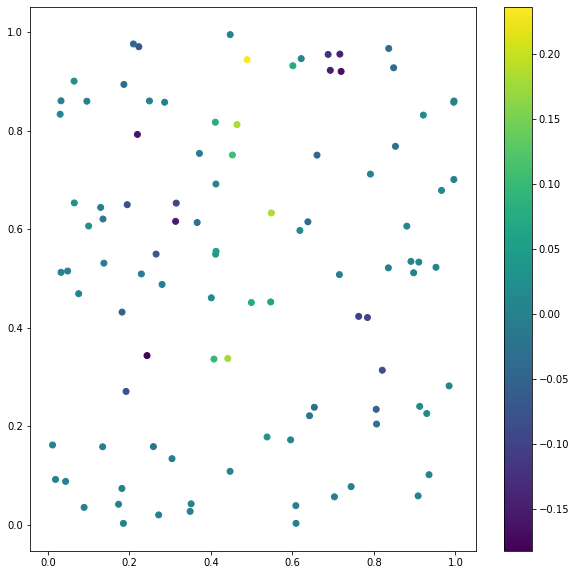

In [99]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
im=ax.scatter(points[:,0], points[:,1],c=values)
plt.colorbar(im)
plt.show()

Para generar y visualizar los polígonos de Voronoi para nuestras observaciones, podemos utlizar las funciones implementeads en la librería scipy:

(100, 2)


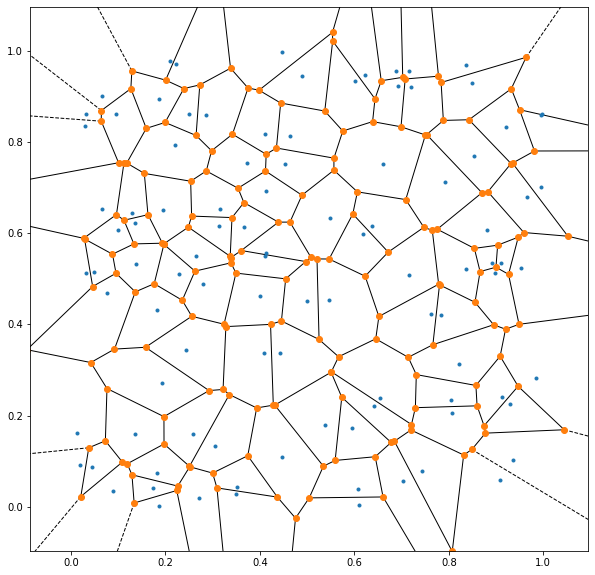

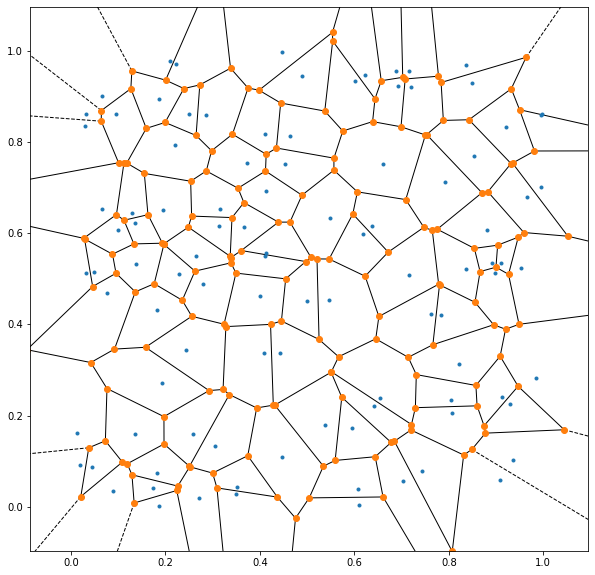

In [100]:
print(points.shape)
vor = Voronoi(points)

fig,ax=plt.subplots(1,1,figsize=(10,10))
voronoi_plot_2d(vor,ax=ax)


Con la función `griddata`, generamos una interpolación a partir del valor del atributo para el vecino más cercano:

In [101]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
print(grid_z0.shape)
print(grid_z0)

(100, 100)
[[2.06491336e-04 2.06491336e-04 2.06491336e-04 ... 2.06174511e-02
  2.06174511e-02 2.06174511e-02]
 [8.84761056e-06 2.06491336e-04 2.06491336e-04 ... 2.06174511e-02
  2.06174511e-02 2.06174511e-02]
 [8.84761056e-06 8.84761056e-06 8.84761056e-06 ... 2.06174511e-02
  2.06174511e-02 2.06174511e-02]
 ...
 [6.41658461e-05 6.41658461e-05 6.41658461e-05 ... 4.44617221e-05
  4.44617221e-05 4.44617221e-05]
 [6.41658461e-05 6.41658461e-05 6.41658461e-05 ... 4.44617221e-05
  4.44617221e-05 4.44617221e-05]
 [6.41658461e-05 6.41658461e-05 6.41658461e-05 ... 4.44617221e-05
  4.44617221e-05 4.44617221e-05]]


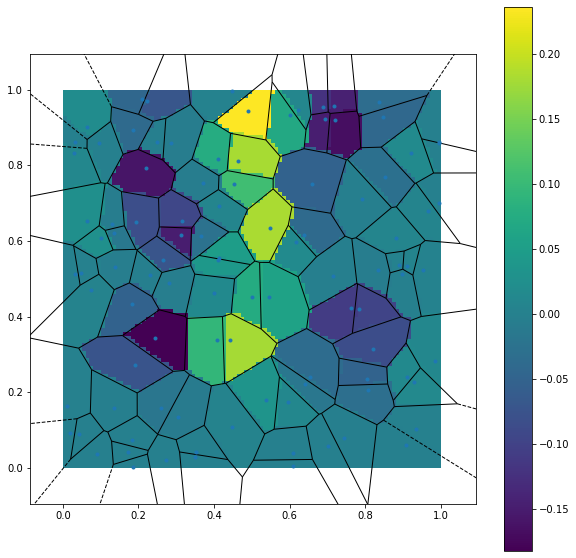

In [102]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
im=ax.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
voronoi_plot_2d(vor,ax=ax,show_vertices=False)
plt.colorbar(im)

Probemos ahora para un conjunto de datos reales, por ejemplo datos de elevación del suelo medidos para un conjunto de puntos en la ciudad de Valparaíso.

In [103]:
#elevaciones medidas para cada manzana de Valparaíso
dat=gpd.read_file('elevaciones_Valpo.gpkg')
print(dat.crs)
dat.head()


{'init': 'epsg:4326'}


,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,Cortado (m,geometry
0,5101021001002,164,24,51.0,POINT (-71.63760 -33.02077)
1,5101021001003,109,14,29.0,POINT (-71.64224 -33.02163)
2,5101011002001,10,4,47.0,POINT (-71.64719 -33.02317)
3,5101021002004,86,44,39.0,POINT (-71.63408 -33.02267)
4,5101011002002,137,41,68.0,POINT (-71.64588 -33.02561)


In [104]:
#manzanas de Valparaíso
#cuando realizamos operaciones que involucran cálculos de distnacias y/o áreas, es recomendable usar un sistema de nidades proyectadas (UTM)

manz=gpd.read_file('manzanas_valpo.gpkg.shp')
print(manz.crs) #crs original del conjunto de datos
manz=manz.to_crs('EPSG:32719') #crs UTM 19S
dat=dat.to_crs('EPSG:32719') #crs UTM 19S
dat.info()

{'init': 'epsg:4674'}


/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 5 columns):
MANZENT_I     2680 non-null object
TOTAL_PERS    2680 non-null int64
TOTAL_VIVI    2680 non-null int64
Cortado (m    2680 non-null float64
geometry      2680 non-null geometry
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 104.8+ KB


Primero graficaremos los datos para visualizar el problema:

,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,Cortado (m,geometry,x,y,z
0,5101021001002,164,24,51.0,POINT (253628.649 6343319.337),253628.648836,6.343319e+06,51.0
1,5101021001003,109,14,29.0,POINT (253197.732 6343212.118),253197.731920,6.343212e+06,29.0
2,5101011002001,10,4,47.0,POINT (252739.180 6343029.963),252739.179923,6.343030e+06,47.0
3,5101021002004,86,44,39.0,POINT (253962.511 6343116.936),253962.510533,6.343117e+06,39.0
4,5101011002002,137,41,68.0,POINT (252868.545 6342762.326),252868.544805,6.342762e+06,68.0


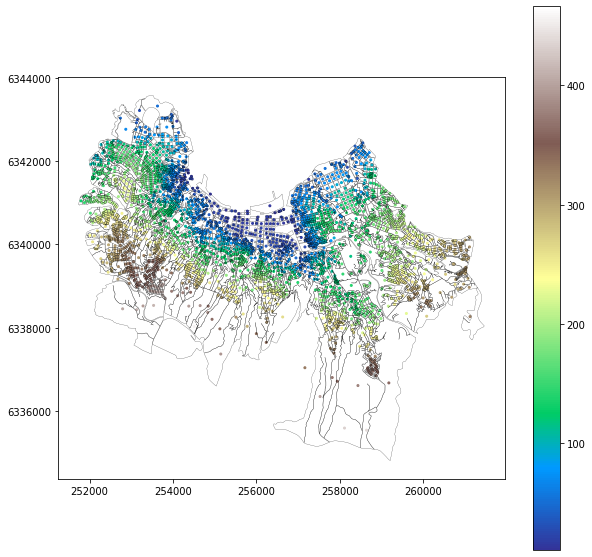

In [123]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
dat.plot(ax=ax,column='Cortado (m',markersize=4,legend=True,cmap='terrain')
manz.boundary.plot(ax=ax,color='k',lw=0.2)
ax.set_aspect('equal')


dat.head()
#la columna "Cortado(m" contiene los datos obervados de elevacion para cada punto

In [117]:
#observaciones: a partir de las geometrias generamos vectores con los valores de coordenadas x,y y el valor
dat['x']=dat.centroid.x
dat['y']=dat.centroid.y
dat['z']=dat['Cortado (m']

dat.head()

,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,Cortado (m,geometry,x,y,z
0,5101021001002,164,24,51.0,POINT (253628.649 6343319.337),253628.648836,6.343319e+06,51.0
1,5101021001003,109,14,29.0,POINT (253197.732 6343212.118),253197.731920,6.343212e+06,29.0
2,5101011002001,10,4,47.0,POINT (252739.180 6343029.963),252739.179923,6.343030e+06,47.0
3,5101021002004,86,44,39.0,POINT (253962.511 6343116.936),253962.510533,6.343117e+06,39.0
4,5101011002002,137,41,68.0,POINT (252868.545 6342762.326),252868.544805,6.342762e+06,68.0


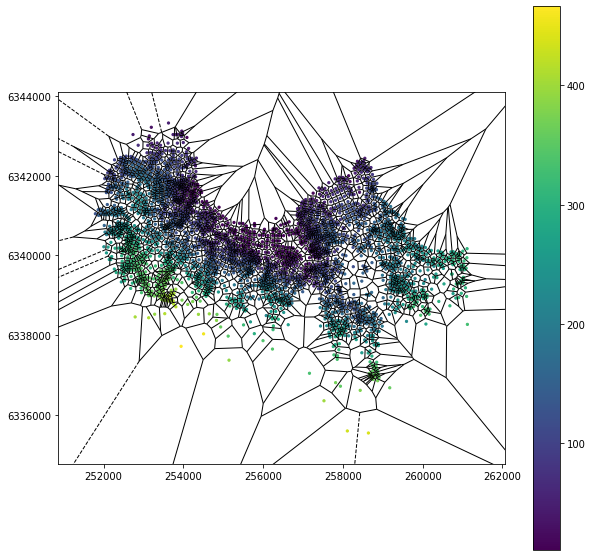

In [122]:
#como argumento para Voronoi, generamos un arreglo de Nx2 dimensiones
points=np.array([[x,y] for x,y, in zip(dat.x,dat.y)])
values =np.array([z for z in dat.z])
vor = Voronoi(points)

#graficamos los poligonos de Voronoi y los datos observados
fig, ax = plt.subplots(1, 1, figsize=(10,10))
art = ax.scatter(dat.x,dat.y, s=5, c=dat.z, cmap='viridis')
voronoi_plot_2d(vor,ax=ax,show_vertices=False,show_points=False)
ax.set_aspect('equal')
plt.colorbar(art)

(933, 778) (933, 778)
(933, 778)


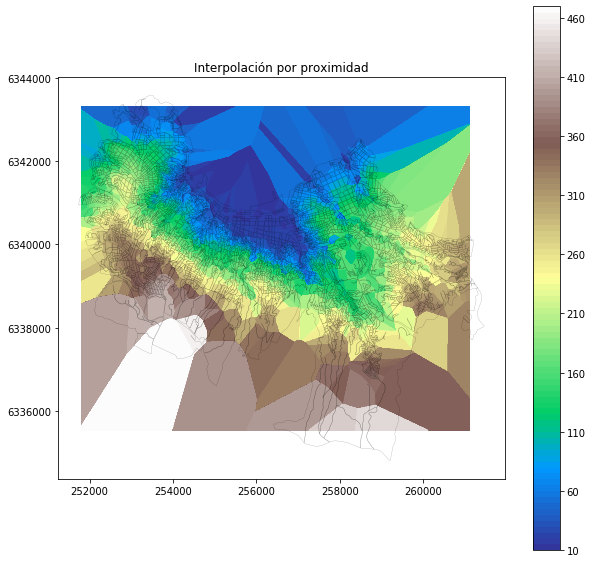

In [126]:
#grilla de puntos para los cuales interpolaremos, entre xmin:xmax e ymin_ymax con espaciamiento de 10 m
grid_x, grid_y = np.mgrid[dat.x.min():dat.x.max():10, dat.y.min():dat.y.max():10]
print(grid_x.shape,grid_y.shape)

z_vor = griddata(points, values, (grid_x, grid_y), method='nearest')
print(z_vor.shape)

fig,ax=plt.subplots(1,1,figsize=(10,10))
im=ax.contourf(grid_x,grid_y,z_vor, 100, cmap='terrain', origin='lower')
manz.boundary.plot(ax=ax,color='k',lw=0.1)
ax.set_aspect('equal')
ax.set_title('Interpolación por proximidad')
plt.colorbar(im)


## Interpolación ponderada inversamente por distancia (IDW):

Para este caso, definiremos nuestra propia función para calcular interpolaciones IDW.

In [109]:
import math
from scipy.spatial import distance_matrix

def dist(x1,y1,x2,y2):#calcula la distancia entre dos puntos (x1,y1) y (x2,y2)
    d=math.sqrt((x1-x2)**2+(y1-y2)**2)
    return(d)

def idwr(x, y, z, xi, yi,n):
    #xi,yi: puntos donde queremos estimar z
    #x,y,z: observaciones
    #n: potencia inversa de d
    
    lstzi=[]
    for p in range(len(xi)): #iteramos sobre todos los puntos de la grilla
        lstdist = [] #lista donde guardamos las distancias a todos los puntos observados
        #iteramos sobre los elementos de los vectores (x,y,z)
        for s in range(len(x)):
            d = dist(x[s], y[s], xi[p], yi[p])
            lstdist.append(d)
        lstdist=np.array(lstdist)
        weights=1/np.power(lstdist, n)
        zi = np.sum(np.array(z)*weights)/np.sum(weights)
        lstzi.append(zi)
    return(np.array(lstzi))

def idwr2(x, y, z, xi, yi,n):
    #xi,yi: puntos donde queremos estimar z
    #x,y,z: observaciones
    points=np.array([[x,y] for x,y, in zip(x,y)]) 
    
    lstzi=[]
    for p in range(len(xi)):
        lstdist = [] #lista donde guardamos las distancias a todos los puntos observados
        #iteramos sobre los elementos de los vectores (x,y,z)
        dists=distance_matrix([[xi[p], yi[p]]],points)
        
        weights=1/np.power(dists, n)
        zi = np.sum(np.array(z)*weights)/np.sum(weights)
        lstzi.append(zi)
    return(np.array(lstzi))

In [110]:
#nuevamente, nuestras obsevaciones
x=dat.x
y=dat.y
z=values

#observaciones
points=np.array([[x,y] for x,y, in zip(dat.x,dat.y)])
values =np.array([z for z in dat.z])

#grilla
xi=np.arange(dat.x.min(),dat.x.max(),100)
yi=np.arange(dat.y.min(),dat.y.max(),100)

#convertimos los vectores xi,yi en una grilla 2d
xx, yy = np.meshgrid(xi,yi)

#xx.flatten(),yy.flatten() son las coordenadas de cada punto de la grilla
gpoints=np.array([[x,y] for x,y, in zip(xx.flatten(),yy.flatten())])


2680 2680


Para visualizar el problema de interpolación, graficamos nuestras observaciones (en colores), y los puntos de la grilla definida (en negro). El objetivo es obtener valores de altura interpolados para cada punto de la grilla.

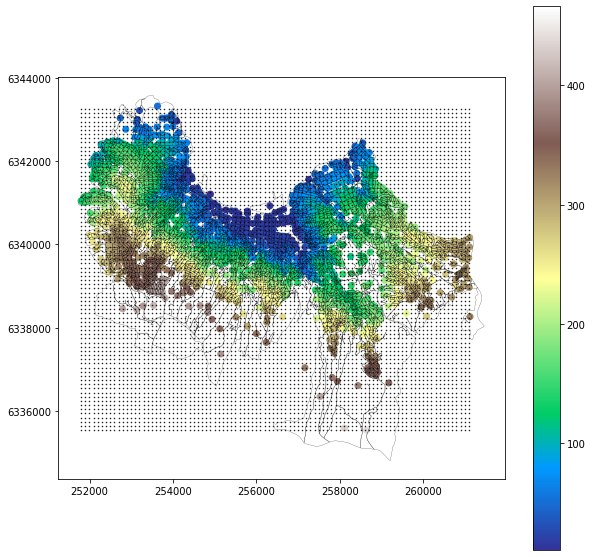

In [127]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
im=ax.scatter(x,y,c=values,cmap='terrain')
manz.boundary.plot(ax=ax,color='k',lw=0.2)

ax.plot(xx, yy, marker='.', markersize=1,color='k', linestyle='none')
plt.colorbar(im,ax=ax)

Calculamos los valores de altura interpolados para cada punto (x,y) de la grilla. Esto nos entregará como resultado un vector de $nx\times ny$ elementos, donde $nx=len(x)$ y $ny=len(y)$.

In [133]:
values_idw=idwr(x,y,values,xx.flatten(),yy.flatten(),2)

KeyboardInterrupt: 

Reformamos el vector de valores obtenido con las mismas dimensiones de la grilla:

In [134]:
z_idw=np.reshape(values_idw,xx.shape)


Luego graficamos la superficie interpolada. Para comparación graficamos también los datos y el resultado de la interpolación por proximidad. Para valores altos de $n$, la interpolación IDW se asemeja mucho a la interpolación por proximidad. Para verificar, puede repetir la interpolación IDW con n=1,2,10,15, etc.

Text(0.5, 1, 'Voronoi')

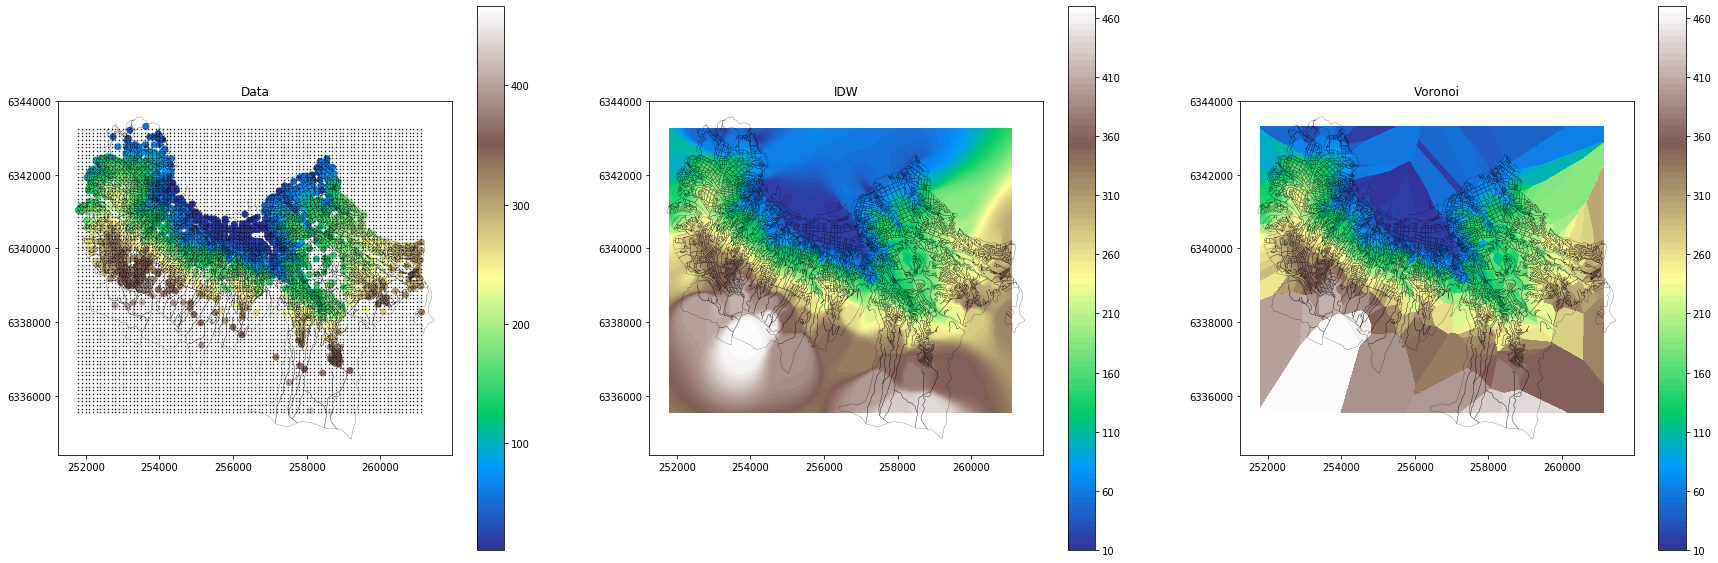

In [138]:
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(30,10))

im=ax0.scatter(x,y,c=values,cmap='terrain')
manz.boundary.plot(ax=ax0,color='k',lw=0.2)
ax0.plot(xx, yy, marker='.', markersize=1,color='k', linestyle='none')
plt.colorbar(im,ax=ax0)
ax0.set_title('Data')

manz.boundary.plot(ax=ax1,color='k',lw=0.2)
im1=ax1.contourf(xx,yy,z_idw, 100, cmap='terrain', origin='lower')
plt.colorbar(im1,ax=ax1)
ax1.set_title('IDW')

im2=ax2.contourf(grid_x,grid_y,z_vor, 100, cmap='terrain', origin='lower')
plt.colorbar(im2,ax=ax2)
manz.boundary.plot(ax=ax2,color='k',lw=0.2)

ax2.set_title('Voronoi')

## Interpolación de primer y segundo orden.

Para las interpolaciones mediante superficies de tendencia de orden 0, primer o segundo orden, podemos utlizar las funciones de minimización por mínimos cuadrados existentes en scipy.
En este caso, definimos funciones $Z(x,y)$ de distinto orden, y calculamos los coeficientes de cada polinomio.

In [ ]:
#grilla
xi=np.arange(dat.x.min(),dat.x.max(),100)
yi=np.arange(dat.y.min(),dat.y.max(),100)
xx, yy = np.meshgrid(xi,yi)

#Orden 1:Z=c0*X+c1*Y+c2 ==> tenemos que calcular los coeficientes c0,c1,c2
A = np.c_[x, y, np.ones(x.shape[0])] #modelo
print(A.shape)
B = z.flatten() #observaciones
print(B.shape)
C, r, rank, s = np.linalg.lstsq(A, B) #funcion que calcula coeficientes C mediante ajuste de minimos cuadrados
print(C)
Z1 = C[0]*xx + C[1]*yy + C[2]

#Orden 1:Z=c0*X+c1*Y+c2*X**2+c3*Y**2+c4*XY==> tenemos que calcular los coeficientes c0,c1,c2,c3,c4
A = np.c_[x, y,x**2,y**2,x*y, np.ones(x.shape[0])]
print(A.shape)
B = z.flatten()
print(B.shape)
C, r, rank, s = np.linalg.lstsq(A, B)
print(C)
Z2 = C[0]*xx + C[1]*yy + C[2]*xx**2+C[3]*yy**2+C[4]*xx*yy

Graficamos ambos modelos:

Text(0.5, 1, 'Order 2')

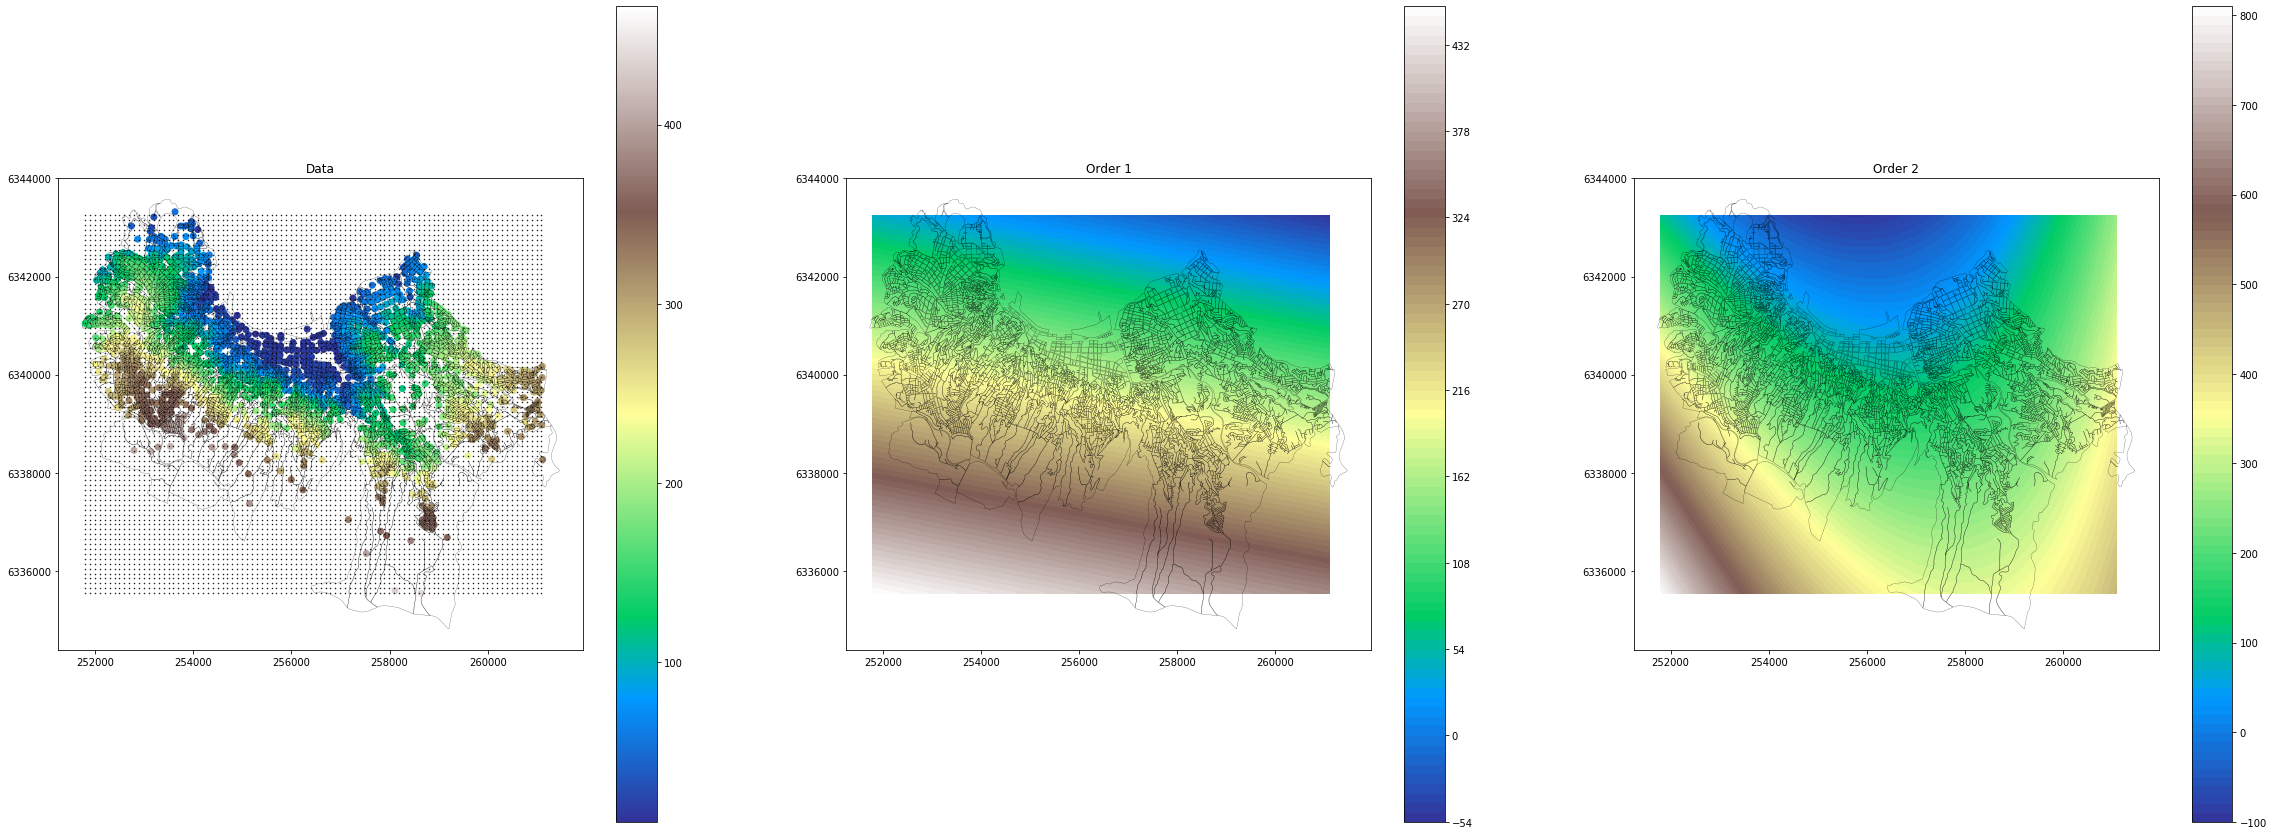

In [139]:
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(40,15))

im=ax0.scatter(x,y,c=values,cmap='terrain')
manz.boundary.plot(ax=ax0,color='k',lw=0.2)
ax0.plot(xx, yy, marker='.', markersize=1,color='k', linestyle='none')
plt.colorbar(im,ax=ax0)
ax0.set_title('Data')

manz.boundary.plot(ax=ax1,color='k',lw=0.2)
im1=ax1.contourf(xx,yy,Z1, 100, cmap='terrain', origin='lower')
plt.colorbar(im1,ax=ax1)
ax1.set_title('Order 1')

im2=ax2.contourf(xx,yy,Z2, 100, cmap='terrain', origin='lower')
manz.boundary.plot(ax=ax2,color='k',lw=0.2)
plt.colorbar(im2,ax=ax2)
ax2.set_title('Order 2')

## Interpolacion por Kriging.

Utilizamos la librería `pykrige` para implementar la interpolación por Kriging.

In [140]:
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging

x=dat.x
y=dat.y
z=dat.z


In [141]:
OK = OrdinaryKriging(x,y,z,variogram_model="linear",verbose=False,enable_plotting=False)
zOK, ss = OK.execute("grid", xi, yi)

In [ ]:
UK = UniversalKriging(x,y,z,variogram_model="linear",verbose=False,enable_plotting=False)
zUK, ss = UK.execute("grid", xi, yi)

Text(0.5, 1, 'Universal Kriging')

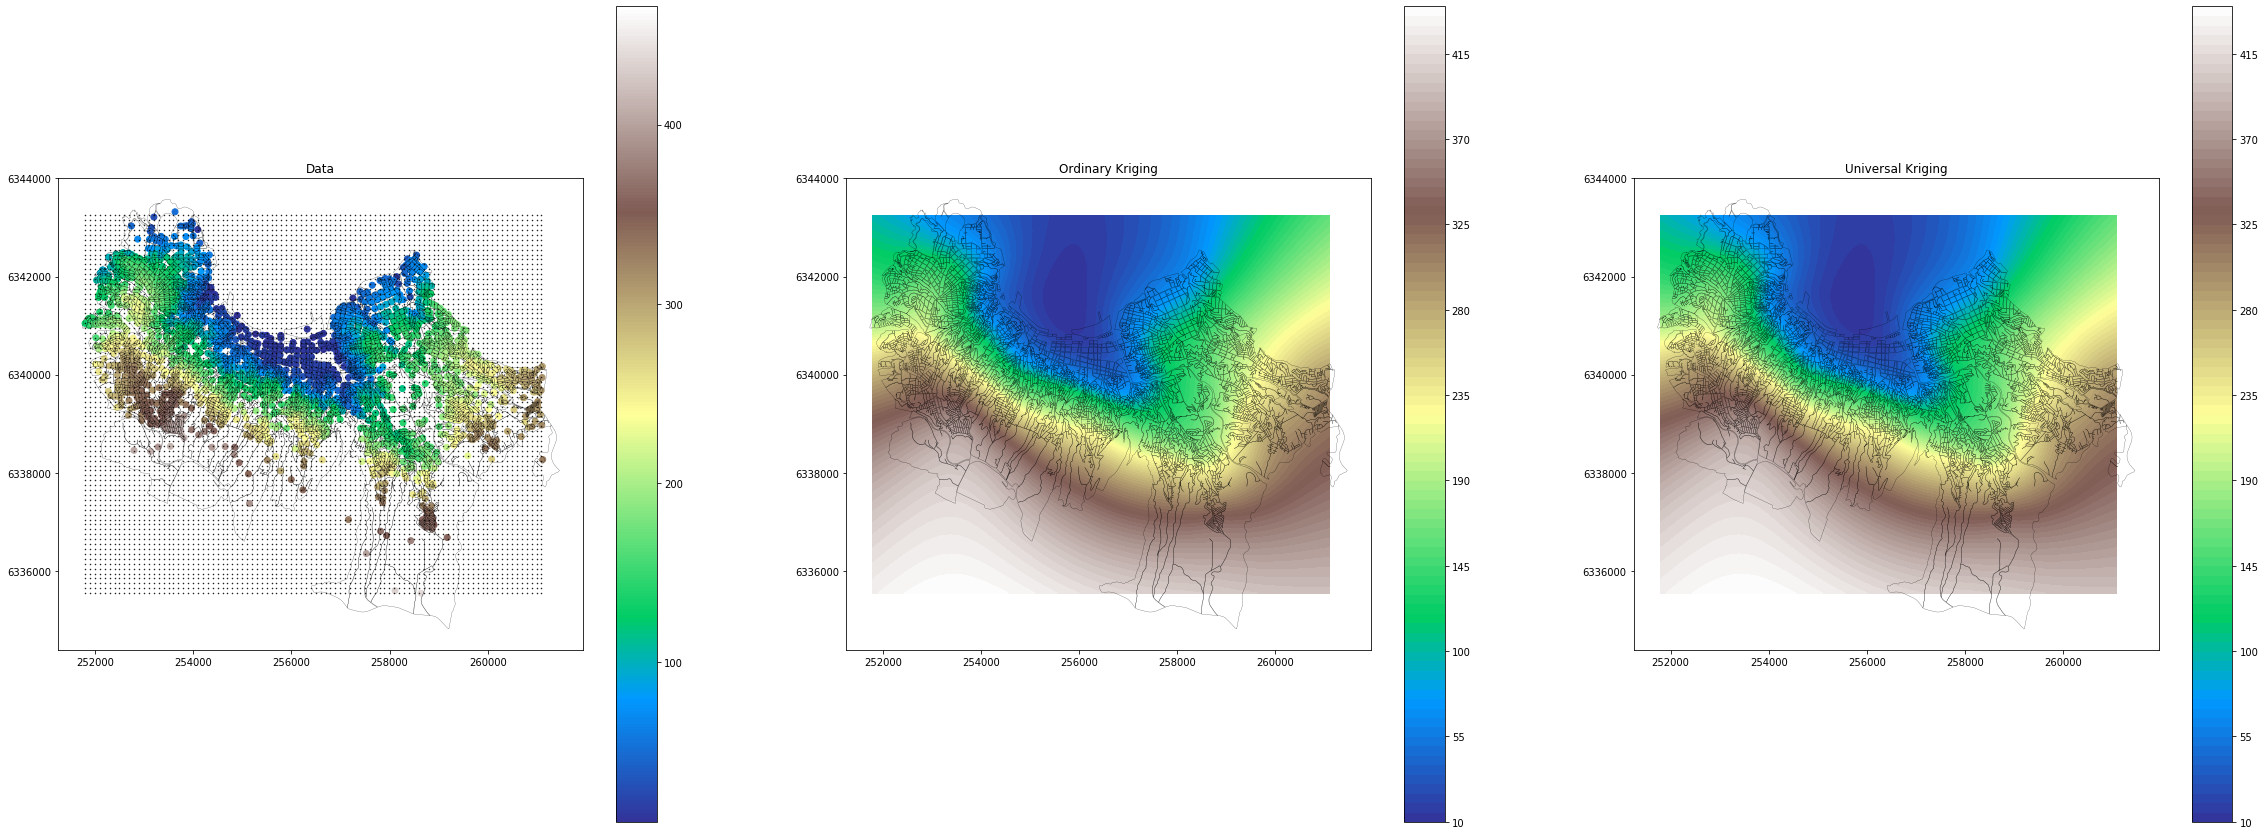

In [142]:
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(40,15))

im=ax0.scatter(x,y,c=values,cmap='terrain')
manz.boundary.plot(ax=ax0,color='k',lw=0.2)
ax0.plot(xx, yy, marker='.', markersize=1,color='k', linestyle='none')
plt.colorbar(im,ax=ax0)
ax0.set_title('Data')

manz.boundary.plot(ax=ax1,color='k',lw=0.2)
im1=ax1.contourf(xx,yy,zOK, 100, cmap='terrain', origin='lower')
plt.colorbar(im1,ax=ax1)
ax1.set_title('Ordinary Kriging')

manz.boundary.plot(ax=ax2,color='k',lw=0.2)
im1=ax2.contourf(xx,yy,zUK, 100, cmap='terrain', origin='lower')
plt.colorbar(im1,ax=ax2)
ax2.set_title('Universal Kriging')